In [2]:
import pandas as pd
df = pd.read_csv("Data01.csv", index_col="no")
df.head()

,text,translate,label1,label2,average
no,,,,,
1,padahal ppkm sudah putus pada tanggal harus su...,even though PPKM has been broken on the date i...,0,0,0
2,since ppkm yg bikin mood ancur bikin frustrate...,since it was PPKM that ruined the mood and mad...,0,0,0
3,ppkm belum hilang sudah ancam prediksi gelomba...,"PPKM hasn't disappeared, it's already threaten...",0,0,0
4,paksa karna ppkm,forced because of ppkm,0,0,0
5,wali kota malang bukti langgar vonis denda juta,the mayor of Malang is proof of violating the ...,0,0,0


In [3]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

In [4]:
import torch
from torch import nn, optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [5]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
sw_indo = stopwords.words("indonesian") + list(punctuation)

In [6]:
X = df.text.values
y = df.average.values

In [7]:
tfidf = TfidfVectorizer(tokenizer=word_tokenize, stop_words=sw_indo)
X = tfidf.fit_transform(X).toarray()

C:\Users\AFA\miniconda3\envs\jcopdl\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['``'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [8]:
(tfidf.get_feature_names())

['abal',
 'abar',
 'abiansemal',
 'abis',
 'abu',
 'acara',
 'aceh',
 'agung',
 'aiptu',
 'air',
 'aja',
 'ajar',
 'akademik',
 'akhmad',
 'akibat',
 'akp',
 'aktivitas',
 'alami',
 'alat',
 'alex',
 'alexander',
 'ambil',
 'amt',
 'an',
 'anak',
 'ancam',
 'ancur',
 'and',
 'andir',
 'anggap',
 'anggota',
 'angka',
 'anjur',
 'antisipasi',
 'aparat',
 'app',
 'apresiasi',
 'arah',
 'area',
 'arif',
 'artikel',
 'asesmen',
 'asing',
 'asli',
 'asn',
 'asu',
 'athari',
 'atlet',
 'atur',
 'aulia',
 'awas',
 'ayo',
 'ayoo',
 'babinsa',
 'baca',
 'badung',
 'bahas',
 'baju',
 'bal',
 'balaidesa',
 'balang',
 'bandara',
 'banding',
 'bando',
 'bandung',
 'bandungrejo',
 'banget',
 'bangettt',
 'bangga',
 'bangkit',
 'bangli',
 'banjarbaru',
 'banjarmasin',
 'bank',
 'bansos',
 'bantah',
 'barat',
 'bareng',
 'bas',
 'batang',
 'batas',
 'batu',
 'bawa',
 'bayan',
 'bayar',
 'bbm',
 'bebas',
 'beda',
 'bego',
 'belat',
 'benny',
 'bentuk',
 'beraktifitas',
 'berani',
 'berat',
 'berita',
 '

In [9]:
dataframe=pd.DataFrame(X, columns=tfidf.get_feature_names(), index=df['text'].values)
dataframe.head()

,abal,abar,abiansemal,abis,abu,acara,aceh,agung,aiptu,air,...,woro,wujud,x,y,ya,yg,yustisi,zaman,zona,zoom
padahal ppkm sudah putus pada tanggal harus sudah mulai dijalanin tanggal bukan tanggal bahkan wna masih boleh masuk hingga tanggal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
since ppkm yg bikin mood ancur bikin frustrated gimana cara dapet uang gimana cara biar bisa bayar ini bayar sampe nafsu makan aja,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.145417,0.0,0.0,0.0,0.0
ppkm belum hilang sudah ancam prediksi gelombang ke entah mau sampai gelombang berapa ken banget rakyat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
paksa karna ppkm,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
wali kota malang bukti langgar vonis denda juta,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [10]:
tfidf_dist = sum(X)
print(tfidf_dist)

[ 0.65172376  0.26181102  0.43831682  1.03933565  1.27973245  0.4567495
  0.44022896  0.66635191  0.57102265  0.35752252  2.77838498  1.43590766
  0.51114047  1.15597412  1.36119137  0.23282916  1.80650486  0.87044378
  1.12098605  0.68995136  0.26912589  0.18655213  0.36860238  0.27542418
  0.53278231  0.35601128  0.44341069  0.33812364  0.74903182  0.30296003
  3.6582238   2.49103083  1.00907309  2.70388066  0.53865539  0.26381695
  0.79277465  0.95678795  1.16662566  0.28282212  0.42060393  1.49572585
  0.76070367  1.71910498  0.76070367  0.57905036  1.33675398  0.42547524
  5.59228695  0.28282212  0.70495073  2.18559026  0.76414296  0.25981822
  1.57236249  0.20467404  0.76070367  0.4471042   2.41409783  0.34557499
  0.46646832  0.53408627  0.31401631  0.34925204  0.74903182  0.25981822
  2.27597852  0.695644    1.22923724  0.74047654  0.37641319  0.40823422
  1.57464237  0.27206536  1.89055335  0.43560441  1.07830123  0.45495095
  0.92217528  0.96354894  4.75190999  1.47657923  0.

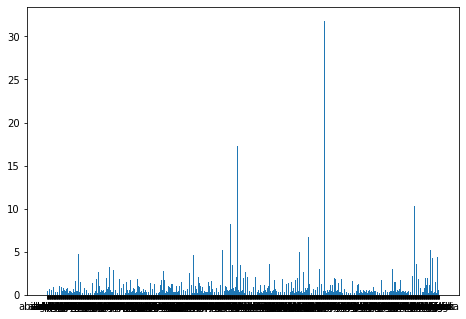

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(tfidf.get_feature_names(),tfidf_dist)
plt.show()

In [12]:
len(tfidf_dist)

988

In [13]:
import statistics

In [14]:
statistics.median(tfidf_dist), statistics.mean(tfidf_dist), statistics.mode(tfidf_dist)

(0.5792755525946323, 1.0235281762544441, 0.20559704569424733)

In [15]:
data_median = {}
for x,y in zip(tfidf.get_feature_names(),tfidf_dist):
    if y>statistics.median(tfidf_dist):
        data_median[x]=y

In [16]:
len(data_median)

492

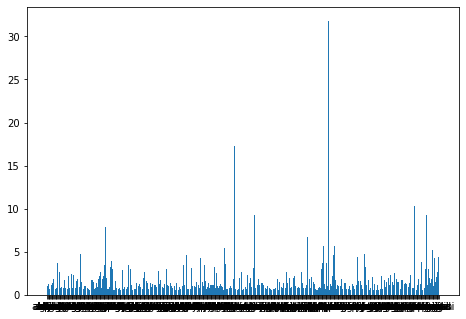

In [17]:
names = list(data_median.keys())
values = list(data_median.values())

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(names,values)
plt.show()

In [18]:
sort_orders = sorted(data_median.items(), key=lambda x: x[1], reverse=True)
sort_orders

[('ppkm', 31.84213554652258),
 ('level', 17.32567256774149),
 ('turun', 10.31807500400063),
 ('masyarakat', 9.301865329883972),
 ('vaksinasi', 9.261669087072693),
 ('laku', 8.166619034272847),
 ('cegah', 7.914729923083906),
 ('giat', 7.681220641511674),
 ('patuh', 7.570940811792893),
 ('perintah', 6.666637390294858),
 ('terap', 5.735315238446628),
 ('protokol', 5.643605737338482),
 ('polsek', 5.610754965876275),
 ('atur', 5.592286951543656),
 ('laksana', 5.422489472617643),
 ('warga', 5.2407050626841905),
 ('ga', 5.195256416682371),
 ('kota', 5.162262529774771),
 ('patroli', 5.008183913932298),
 ('batas', 4.751909990659005),
 ('sehat', 4.727730105030444),
 ('prokes', 4.6469782847544545),
 ('kalo', 4.615697486158437),
 ('sampe', 4.407979294400149),
 ('yg', 4.387028339249303),
 ('wilayah', 4.299031523933305),
 ('sebar', 4.287880944576838),
 ('disiplin', 4.266336944892492),
 ('kena', 4.214224197854321),
 ('jawa', 4.034805128838689),
 ('covid', 3.957174340330108),
 ('upaya', 3.819603033159

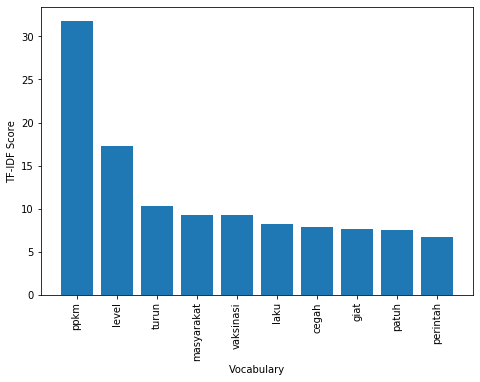

In [19]:
topName = [i[0] for i in sort_orders]
topValue = [i[1] for i in sort_orders]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(topName[:10],topValue[:10])
plt.xticks(rotation=90)
ax.set_xlabel('Vocabulary')
ax.set_ylabel('TF-IDF Score')
plt.show()
plt.show()

In [97]:
X_new = df.text.values
y_new = df.average.values

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, stratify=y_new, random_state=1234)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((288,), (72,), (288,), (72,))

In [99]:
tfidf = TfidfVectorizer(tokenizer=word_tokenize, stop_words=sw_indo)
XX_train = tfidf.fit_transform(X_train).toarray()
XX_test = tfidf.transform(X_test).toarray()

C:\Users\AFA\miniconda3\envs\jcopdl\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['``'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [118]:
tfidf.get_feature_names()

['abal',
 'abar',
 'abis',
 'abu',
 'acara',
 'aceh',
 'agung',
 'aiptu',
 'air',
 'aja',
 'ajar',
 'akademik',
 'akhmad',
 'akibat',
 'akp',
 'aktivitas',
 'alami',
 'alat',
 'alex',
 'alexander',
 'ambil',
 'amt',
 'an',
 'anak',
 'ancam',
 'ancur',
 'and',
 'andir',
 'anggap',
 'anggota',
 'angka',
 'anjur',
 'antisipasi',
 'aparat',
 'app',
 'apresiasi',
 'arah',
 'area',
 'arif',
 'artikel',
 'asesmen',
 'asing',
 'asli',
 'asn',
 'asu',
 'athari',
 'atlet',
 'atur',
 'aulia',
 'awas',
 'ayo',
 'babinsa',
 'baca',
 'badung',
 'bahas',
 'baju',
 'bal',
 'balaidesa',
 'balang',
 'bandara',
 'banding',
 'bando',
 'bandung',
 'bandungrejo',
 'banget',
 'bangettt',
 'bangga',
 'bangkit',
 'banjarbaru',
 'banjarmasin',
 'bank',
 'bansos',
 'bantah',
 'barat',
 'bareng',
 'bas',
 'batang',
 'batas',
 'batu',
 'bawa',
 'bayan',
 'bayar',
 'bbm',
 'bebas',
 'bego',
 'belat',
 'benny',
 'bentuk',
 'beraktifitas',
 'berani',
 'berat',
 'berita',
 'berkat',
 'bgt',
 'bhabinkamtibmas',
 'biar'

In [112]:
df_X_train=pd.DataFrame(XX_train, columns=tfidf.get_feature_names(), index=X_train)
df_X_train.head()

,abal,abar,abis,abu,acara,aceh,agung,aiptu,air,aja,...,woro,wujud,x,y,ya,yg,yustisi,zaman,zona,zoom
jumlah ortu siswa dukung sekolah tatap muka di padang lanjut meski ppkm level,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
anggota koramil nguter dan polsek intensif sambang warga masyarakat yang sedang beraktifitas di menghimbau warga agar tetap patuh jangan lengah tengah laku ppkm level di kabupaten,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
laksana operasi yustisi disiplin protokol sehat pada masa laku batas giat masyarakat dalam upaya cegah dan kendali sebar di wilayah hukum polsek operasi yustisi di pimpin waka polsek akp philep j mende,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.37397,0.0,0.0,0.0
kepada para kepala sekolah saya sila untuk segera laku giat ajar tatap muka batas dengan syarat wilayah sekolah sebut minimal sudah pada level ppkm dan vaksinasi covid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
kasatpol pp camat koja apresiasi patuh masyarakat hadap atur ppkm level,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0


In [114]:
df_X_test=pd.DataFrame(XX_test, columns=tfidf.get_feature_names(), index=X_test)
df_X_test.head()

,abal,abar,abis,abu,acara,aceh,agung,aiptu,air,aja,...,woro,wujud,x,y,ya,yg,yustisi,zaman,zona,zoom
dukung bijak perintah dalam terap ppkm,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
jakarta kapolri jenderal listyo sigit prabowo beri arah baru lalu kepada seluruh polda jajar kait dengan evaluasi laku batas giat masyarakat selasa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pantai pulo kodok tegal lama ppkm sepi unjung,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
moga ga ada ppkm dulu buat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ppkm layak dukung,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
except1 = ['otak', 'ayoo', 'lhoo', 'kbb', 'pemda', 'sulit', 'positivity', 'ck', 'layak', 'miskin', 'detikhealth', 'rate']
names2 = []
for i in names:
    if i in except1:
        pass
    else:
        names2.append(i)

In [126]:
df_XX_Train = df_X_train[names2].to_numpy()
df_XX_Test = df_X_test[names2].to_numpy()

In [138]:
df_XX_Train.shape, df_XX_Test.shape, y_train.shape, y_test.shape

((288, 480), (72, 480), (288,), (72,))

In [141]:
from torch.utils.data import DataLoader, TensorDataset

In [148]:
X_train = torch.FloatTensor(df_XX_Train).to(device)
X_test = torch.FloatTensor(df_XX_Test).to(device)
y_train = torch.LongTensor(y_train).to(device)
y_test = torch.LongTensor(y_test).to(device)

In [150]:
bs = 128

train_set = TensorDataset(X_train, y_train)
trainloader = DataLoader(train_set, batch_size=bs, shuffle=True, num_workers=8)

test_set = TensorDataset(X_test, y_test)
testloader = DataLoader(test_set, batch_size=bs, num_workers=8)

In [151]:
len(train_set), len(test_set), len(trainloader), len(testloader)

(288, 72, 3, 1)

# Arsitektur dan Config

In [152]:
from jcopdl.layers import linear_block

In [153]:
class FashionClassfier(nn.Module):
    def __init__(self, input_size, output_size, dropout=0.2):
        super().__init__()
        self.fc = nn.Sequential(
            linear_block(input_size, 64, dropout=dropout),
            linear_block(64, 64, dropout=dropout),
            linear_block(64, output_size, activation="lsoftmax") #, activation="lsoftmax"
        )
         
    def forward(self, x):
        return self.fc(x)      

In [154]:
from jcopdl.callback import Callback, set_config

config = set_config({
    "input_size": X_train.shape[1],
    "output_size": 3,
    "dropout": 0.2
})

# Training Prep -> MCOC

In [155]:
model = FashionClassfier(config.input_size, config.output_size, config.dropout).to(device)
criterion = nn.NLLLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.01)
callback = Callback(model, config, outdir="SentimenModel", early_stop_patience=10)

In [156]:
print(model.train())

FashionClassfier(
  (fc): Sequential(
    (0): Sequential(
      (0): Linear(in_features=480, out_features=64, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.2, inplace=False)
    )
    (1): Sequential(
      (0): Linear(in_features=64, out_features=64, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.2, inplace=False)
    )
    (2): Sequential(
      (0): Linear(in_features=64, out_features=3, bias=True)
      (1): LogSoftmax()
    )
  )
)


In [157]:
print(model.eval())

FashionClassfier(
  (fc): Sequential(
    (0): Sequential(
      (0): Linear(in_features=480, out_features=64, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.2, inplace=False)
    )
    (1): Sequential(
      (0): Linear(in_features=64, out_features=64, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.2, inplace=False)
    )
    (2): Sequential(
      (0): Linear(in_features=64, out_features=3, bias=True)
      (1): LogSoftmax()
    )
  )
)


# Training 

In [158]:
from tqdm.auto import tqdm

def loop_fn(mode, dataset, dataloader, model, criterion, optimizer, device):   
    if mode == "train":
        model.train()
    elif mode == "test":
        model.eval()
    cost = correct = 0
    for feature, target in tqdm(dataloader, desc=mode.title()):
        feature, target = feature.to(device), target.to(device)
        output = model(feature)
        loss = criterion(output, target)
        
        if mode == "train":
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        cost += loss.item() * feature.shape[0]
        correct += (output.argmax(1) == target).sum().item()
    cost = cost / len(dataset)
    acc = correct / len(dataset)
    return cost, acc



Epoch     1
Train_cost  = 1.1002 | Test_cost  = 1.0853 | Train_score = 0.3611 | Test_score = 0.3611 |




Epoch     2
Train_cost  = 1.0723 | Test_cost  = 1.0467 | Train_score = 0.5174 | Test_score = 0.5278 |




Epoch     3
Train_cost  = 1.0079 | Test_cost  = 0.9556 | Train_score = 0.6944 | Test_score = 0.6944 |




Epoch     4
Train_cost  = 0.8635 | Test_cost  = 0.7976 | Train_score = 0.8472 | Test_score = 0.7500 |




Epoch     5
Train_cost  = 0.6378 | Test_cost  = 0.6594 | Train_score = 0.8750 | Test_score = 0.7639 |




Epoch     6
Train_cost  = 0.4095 | Test_cost  = 0.6640 | Train_score = 0.8785 | Test_score = 0.7639 |
==> EarlyStop patience =  1 | Best test_score: 0.7639




Epoch     7
Train_cost  = 0.2715 | Test_cost  = 0.7787 | Train_score = 0.8889 | Test_score = 0.7778 |




Epoch     8
Train_cost  = 0.2153 | Test_cost  = 0.9247 | Train_score = 0.9132 | Test_score = 0.7639 |
==> EarlyStop patience =  1 | Best test_score: 0.7778




Epoch     9
Train_cost  = 0.1669 | Test_cost  = 1.1143 | Train_score = 0.9375 | Test_score = 0.7222 |
==> EarlyStop patience =  2 | Best test_score: 0.7778




Epoch    10
Train_cost  = 0.1706 | Test_cost  = 1.2227 | Train_score = 0.9340 | Test_score = 0.7361 |
==> EarlyStop patience =  3 | Best test_score: 0.7778




Epoch    11
Train_cost  = 0.1566 | Test_cost  = 1.2804 | Train_score = 0.9236 | Test_score = 0.7639 |
==> EarlyStop patience =  4 | Best test_score: 0.7778




Epoch    12
Train_cost  = 0.2052 | Test_cost  = 1.3404 | Train_score = 0.9167 | Test_score = 0.7222 |
==> EarlyStop patience =  5 | Best test_score: 0.7778




Epoch    13
Train_cost  = 0.1683 | Test_cost  = 1.4819 | Train_score = 0.9306 | Test_score = 0.6667 |
==> EarlyStop patience =  6 | Best test_score: 0.7778




Epoch    14
Train_cost  = 0.1961 | Test_cost  = 1.5090 | Train_score = 0.9167 | Test_score = 0.7083 |
==> EarlyStop patience =  7 | Best test_score: 0.7778




Epoch    15
Train_cost  = 0.1708 | Test_cost  = 1.3819 | Train_score = 0.9375 | Test_score = 0.7222 |
==> EarlyStop patience =  8 | Best test_score: 0.7778




Epoch    16
Train_cost  = 0.1706 | Test_cost  = 1.3043 | Train_score = 0.9271 | Test_score = 0.7639 |
==> EarlyStop patience =  9 | Best test_score: 0.7778




Epoch    17
Train_cost  = 0.1789 | Test_cost  = 1.2803 | Train_score = 0.9340 | Test_score = 0.7500 |
==> EarlyStop patience = 10 | Best test_score: 0.7778
==> Execute Early Stopping at epoch: 17 | Best test_score: 0.7778
==> Best model is saved at SentimenModel


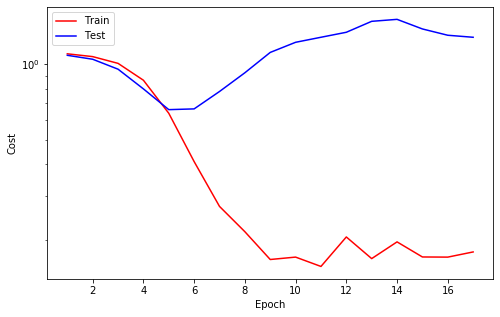

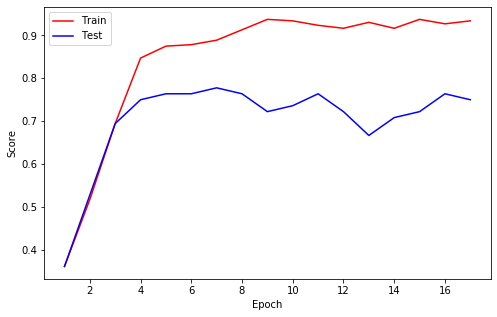

In [159]:
while True:
    train_cost, train_score = loop_fn("train", train_set, trainloader, model, criterion, optimizer, device)
    with torch.no_grad():
        test_cost, test_score = loop_fn("test", test_set, testloader, model, criterion, optimizer, device)
    
    # Logging
    callback.log(train_cost, test_cost, train_score, test_score)
    
    # Checkpoint
    callback.save_checkpoint()
    
    # Runtime Plotting
    callback.cost_runtime_plotting()
    callback.score_runtime_plotting()
    
    # Early Stopping
    if callback.early_stopping(model, monitor="test_score"):
        callback.plot_cost()
        callback.plot_score()
        break

In [166]:
X_eval = tfidf.transform(X_new).toarray()
y_eval = y_new

In [173]:
df_X_eval=pd.DataFrame(X_eval, columns=tfidf.get_feature_names(), index=X_new)
df_X_eval.head()

,abal,abar,abis,abu,acara,aceh,agung,aiptu,air,aja,...,woro,wujud,x,y,ya,yg,yustisi,zaman,zona,zoom
padahal ppkm sudah putus pada tanggal harus sudah mulai dijalanin tanggal bukan tanggal bahkan wna masih boleh masuk hingga tanggal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
since ppkm yg bikin mood ancur bikin frustrated gimana cara dapet uang gimana cara biar bisa bayar ini bayar sampe nafsu makan aja,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.177083,...,0.0,0.0,0.0,0.0,0.0,0.151883,0.0,0.0,0.0,0.0
ppkm belum hilang sudah ancam prediksi gelombang ke entah mau sampai gelombang berapa ken banget rakyat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
paksa karna ppkm,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
wali kota malang bukti langgar vonis denda juta,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [174]:
df_XX_Eval = df_X_eval[names2].to_numpy()

In [175]:
X_eval = torch.FloatTensor(df_XX_Eval).to(device)

In [176]:
y_eval = torch.LongTensor(y_eval).to(device)

In [177]:
with torch.no_grad():
    model.eval()
    output = model(X_eval)

In [178]:
pred = output.argmax(1).numpy()
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2,

In [179]:
correctPred = 0
count = 0
for i in range(len(pred)):
    count += 1
    if pred[i] == y_eval[i]:
        correctPred += 1
print('ANN Accuracy:',correctPred/count)

ANN Accuracy: 0.8916666666666667


In [181]:
from sklearn.metrics import confusion_matrix

In [182]:
cf_matrix = confusion_matrix(y_eval, pred)
print(cf_matrix)

[[116  12   0]
 [ 10 108   7]
 [  2   8  97]]


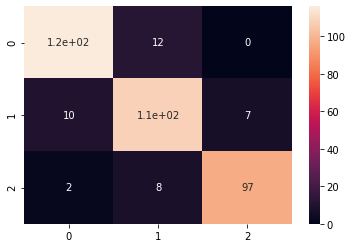

In [183]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

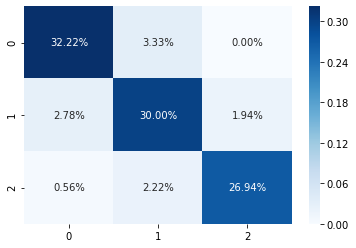

In [184]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

# 0: Negatif 1: Netral 2: Positif

In [243]:
pos_kata = 'ppkm dan vaksinasi dapat menurunkan kasus covid'
net_kata = 'polres lakukan edukasi warga terkait ppkm level satu'
neg_kata = 'ppkm bikin mood ancur bikin frustrasi gimana cara dapet uang gimana cara biar bisa bayar ini bayar itu'
kata = [pos_kata, net_kata, neg_kata]

X_try = tfidf.transform(kata).toarray()
y_try = [2,1,0]

In [244]:
df_X_try=pd.DataFrame(X_try, columns=tfidf.get_feature_names(), index=kata)
df_X_try.head()

,abal,abar,abis,abu,acara,aceh,agung,aiptu,air,aja,...,woro,wujud,x,y,ya,yg,yustisi,zaman,zona,zoom
ppkm dan vaksinasi dapat menurunkan kasus covid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
polres lakukan edukasi warga terkait ppkm level satu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ppkm bikin mood ancur bikin frustrasi gimana cara dapet uang gimana cara biar bisa bayar ini bayar itu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [245]:
df_XX_try = df_X_try[names2].to_numpy()

In [246]:
X_try = torch.FloatTensor(df_XX_try).to(device)
y_try = torch.LongTensor(y_try).to(device)

In [247]:
with torch.no_grad():
    model.eval()
    output_try = model(X_try)

In [248]:
pred = output_try.argmax(1).numpy()
pred

array([2, 1, 0], dtype=int64)